In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [11]:
df = pd.read_csv('VaneTrapSampleData.csv')
df

,Sample ID,Country,State,County,Locality,Decimal Latitude,Decimal Longitude,Elevation (m),Start Day,Start Month,...,vandykei Q,vandykei W,vandykei M,vancouverensis Q,vancouverensis W,vancouverensis M,vosnesenskii Q,vosnesenskii W,vosnesenskii M,total
0,OBAS-00657,USA,OR,Jackson,"RRSNF, Silver Fork Gap",42.0393,-122.9159,NaN,31,vii,...,0,2,0,2,37,31,5,1748,317,2252
1,OBAS-00016,USA,OR,Umatilla,"Kelly Meadow, Umatilla NF",45.1586,-119.2768,NaN,19,June,...,0,0,0,181,9,0,10,0,0,1316
2,OBAS-00526,USA,OR,Umatilla,"Kelly Meadow, Umatilla NF",45.1586,-119.2768,NaN,19,july,...,0,0,0,62,168,39,1,4,1,687
3,OBAS-00756,USA,OR,Jackson,"Cascade-siskiyou national monument, moon prairie",42.2540,-122.3720,NaN,21,july,...,1,0,0,9,28,6,1,110,15,226


In [12]:
df = df.iloc[:2,19:-1].reset_index()

species_names = set(col.rsplit(' ', 1)[0] for col in df.columns)

for species in species_names:
    species_matches = [col for col in df.columns if col.startswith(species)]
    df[species] = df[species_matches].sum(axis=1)
    df.drop(columns=species_matches, inplace=True)

df = df.loc[:, (df != 0).any(axis=0)]

In [13]:
species_matches

['fervidus Q', 'fervidus W', 'fervidus M']

In [14]:
df = df[df.iloc[0].sort_values(ascending=True).index]

In [15]:
len(df.columns)

15

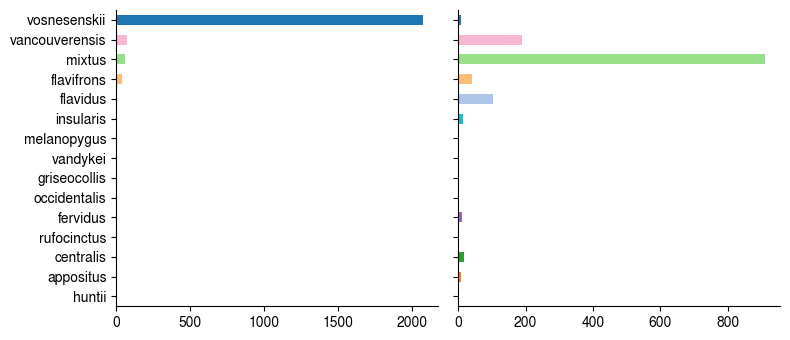

In [16]:
# plt.rcParams['font.family'] = 'Helvetica'

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(8, 3.5), sharey=True, gridspec_kw={'width_ratios': [1, 1]})

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf', '#aec7e8', '#ffbb78', '#98df8a', '#f7b6d2']


for idx, ax in enumerate(axs):
    row_data = df.loc[idx,:]
    row_data.plot(kind='barh', ax=ax, color=colors)
    # ax.set_xlim(0, 280)
    # if idx == 0:
    #     ax.set_ylabel('Species')
    # else:
    #     ax.set_ylabel('')

plt.tight_layout()
# plt.savefig('trap_species_list.svg', bbox_inches='tight', pad_inches=0, format='svg', dpi=300)